### 活性化関数(activation functions)

In [1]:
import numpy as np

In [2]:
y = np.arange(-5, 5, 1) <= 0
y

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False])

In [3]:
y.astype(np.int64)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [4]:
type(y)

numpy.ndarray

In [5]:
def step_function(x: np.ndarray) -> np.ndarray:
	y = x > 0
	return y.astype(np.int64)

In [6]:
def sigmoid(x: np.ndarray) -> np.ndarray:
	y = 1/(1+np.exp(-x))
	return y

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib

In [8]:
x = np.arange(-5, 5, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)

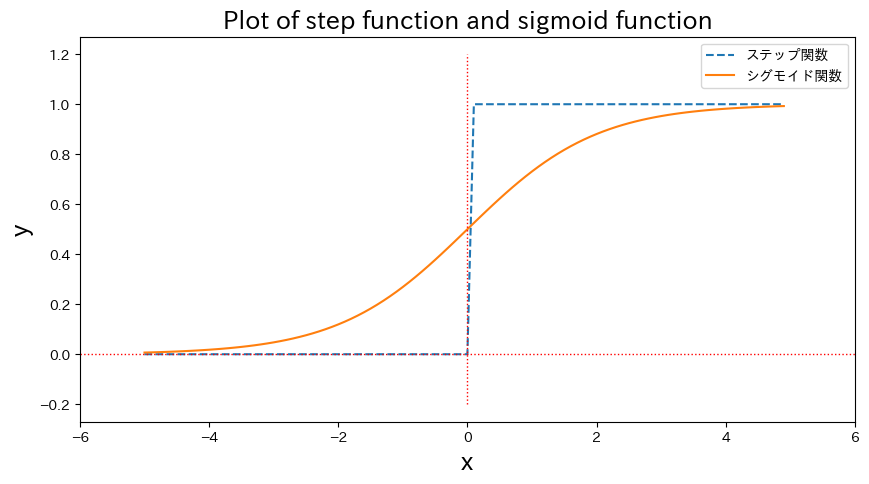

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(x, y1, label='ステップ関数', linestyle='dashed')
plt.plot(x, y2, label='シグモイド関数')
plt.hlines(y=0, xmin=-6, xmax=6, color='r',linewidth=1, linestyles='dotted')
plt.vlines(x=0, ymin=-0.2, ymax=1.2, color='r', linewidth=1, linestyles='dotted')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title('Plot of step function and sigmoid function', fontsize=18)
plt.xlim(-6, 6)
plt.legend()
plt.show()

In [10]:
def relu(x: np.ndarray) -> np.ndarray:
	return np.maximum(0, x)

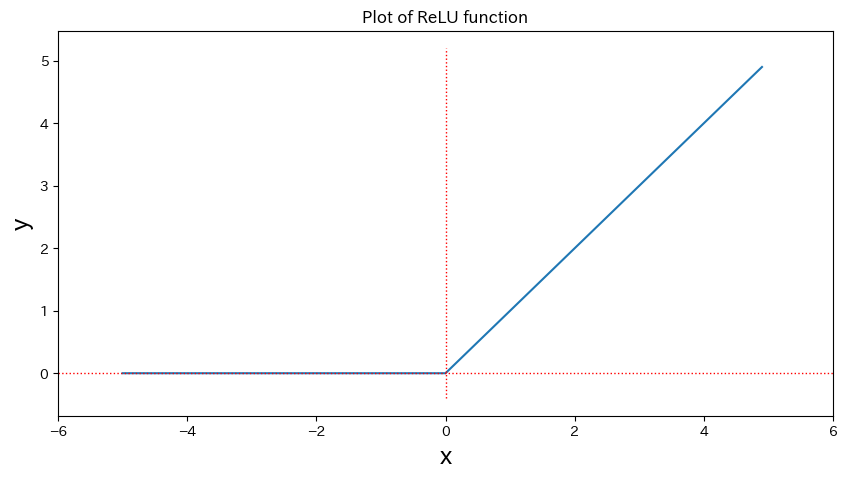

In [11]:
x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.hlines(y=0, xmin=-6, xmax=6, color='r',linewidth=1, linestyles='dotted')
plt.vlines(x=0, ymin=-0.4, ymax=5.2, color='r', linewidth=1, linestyles='dotted')
plt.title('Plot of ReLU function')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.xlim(-6, 6)
plt.show()

In [12]:
X = np.array([[1],
             [2]])
X.shape

(2, 1)

In [13]:
W = np.array([[1, 2],
              [3, 4],
        	  [5, 6]])
W.shape

(3, 2)

In [14]:
y = np.dot(W, X)
print(y)
print(y.shape)

[[ 5]
 [11]
 [17]]
(3, 1)


### 多層ニューラルネットワークの実装

In [15]:
# 第１層の処理
# A1 = XW(1) + B(1)
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape, W1.shape, B1.shape)
A1 = np.dot(X, W1) + B1
print(A1)

# 活性化関数 -> sigmoid
Z1 = sigmoid(A1)
print(Z1)

(2,) (2, 3) (3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [24]:
# 第２層の処理
W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
         	   [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape, W2.shape, B2.shape)

A2 = np.dot(Z1, W2) + B2
print(A2)

Z2 = sigmoid(A2)
print(Z2)

(3,) (3, 2) (2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [26]:
def indentify_function(x: np.ndarray) -> np.ndarray:
	return x

In [29]:
def init_network():
	network = {}
	network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 2x3
	network['b1'] = np.array([0.1, 0.2, 0.3]) # (3,)
	network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # 3x2
	network['b2'] = np.array([0.1, 0.2]) # (2,)
	network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]]) # 2x2
	network['b3'] = np.array([0.1, 0.2]) # (2,1)

	return network

def forward(network, X):
	W1, W2, W3 = network['W1'], network['W2'], network['W3']
	b1, b2, b3 = network['b1'], network['b2'], network['b3']

	A1 = np.dot(X,W1) + b1
	Z1 = sigmoid(A1)
	A2 = np.dot(Z1,W2) + b2
	Z2 = sigmoid(A2)
	A3 = np.dot(Z2,W3) + b3
	Y = indentify_function(A3)

	return Y

In [30]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network=network, X=x)
print(y)

[0.31682708 0.69627909]


In [32]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [34]:
y = exp_a / exp_a.sum()
y

array([0.01821127, 0.24519181, 0.73659691])

In [35]:
def softmax(x: np.ndarray) -> np.ndarray:
	return np.exp(x) / (np.exp(x)).sum()

In [36]:
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [37]:
np.exp(10)

22026.465794806718

In [38]:
np.exp(1000)

/var/folders/dl/zlcf_v7n60z8pgq6gpngkskh0000gn/T/ipykernel_31242/2006519253.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


inf

In [43]:
def softmax(x: np.ndarray) -> np.ndarray:
	c = np.max(x)
	exp_a = np.exp(x - c) # オーバーフロー対策
	sum_exp_a = np.sum(exp_a)
	y = exp_a / sum_exp_a
	return y

In [45]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [46]:
np.sum(y)

1.0